In [47]:
# solución de placa
import numpy as np
import matplotlib.pyplot as plt

Lx = 10
Ly = 20
h = 1 

x = np.arange(0,Lx+h,h)
y = np.arange(0,Ly+h,h)

X,Y = np.meshgrid(x,y)
T = np.zeros((len(y),len(x)))

# condiciones de frontera
T[:,0] = 25
T[0,:] = 0
T[:,-1] = 50
T[-1,:]= 100


In [48]:
Error = 1
while Error > 0.1:
    Tant = T.copy()
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            T[j][i] = (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4

    Error = np.max(T-Tant)

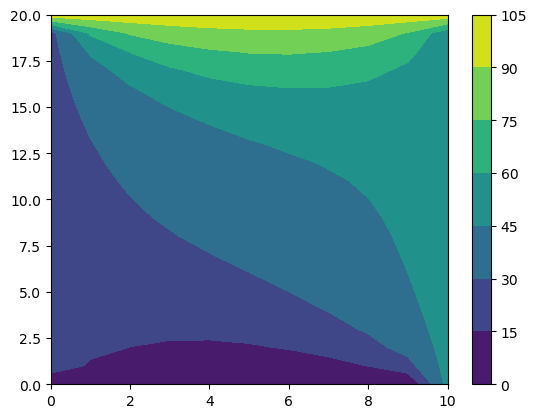

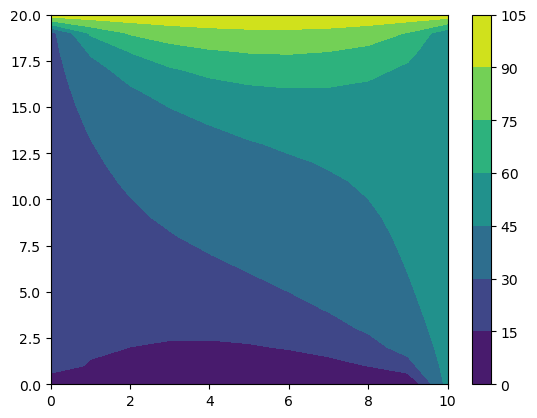

In [49]:
plt.figure()
plt.contourf(X,Y,Tant)
plt.colorbar()
plt.figure()
plt.contourf(X,Y,T)
plt.colorbar()


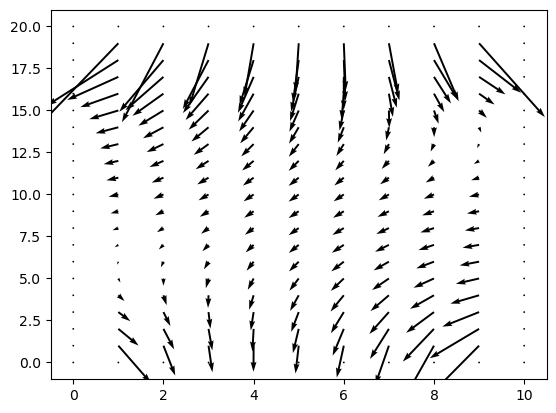

In [50]:
# derivadas de dT/dx
dTdx = np.zeros((len(y),len(x)))
dTdy = np.zeros((len(y),len(x)))
for i in range(1,len(x)-1):
    for j in range (1,len(y)-1):
        dTdx[j][i]= (T[j][i+1] - T[j][i-1])/2/h
        dTdy[j][i]= (T[j+1][i] - T[j-1][i])/2/h

k = 5
qx = -k*dTdx
qy = -k*dTdy

plt.quiver(x,y,qx,qy)

In [51]:
qy

array([[  -0.        ,   -0.        ,   -0.        ,   -0.        ,
          -0.        ,   -0.        ,   -0.        ,   -0.        ,
          -0.        ,   -0.        ,   -0.        ],
       [  -0.        ,  -46.49354285,  -37.26162974,  -33.13692941,
         -32.52041682,  -34.70880096,  -39.78676377,  -48.6617278 ,
         -63.39194821,  -87.61351263,   -0.        ],
       [  -0.        ,  -20.84125037,  -25.58378976,  -26.85083856,
         -28.08358968,  -30.22024695,  -33.47214605,  -37.56079591,
         -40.84263488,  -36.66506915,   -0.        ],
       [  -0.        ,  -11.35975932,  -17.49013732,  -20.73191255,
         -22.88581254,  -24.7552147 ,  -26.44225281,  -27.36014839,
         -25.81076847,  -18.22312904,   -0.        ],
       [  -0.        ,   -7.1732688 ,  -12.38378787,  -15.82130403,
         -18.10192809,  -19.5979655 ,  -20.29112979,  -19.71098469,
         -16.86931275,  -10.43359416,   -0.        ],
       [  -0.        ,   -5.00783334,   -9.1378437